Import required libraries.

In [22]:
import matplotlib.pyplot as plt
#numpy is used to arrays
import numpy as np
import os
import PIL
import tensorflow as tsf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.datasets import cifar10
from keras.layers import Dense,Dropout,Flatten,BatchNormalization,Activation
from keras.layers.convolutional import Conv2D,MaxPooling2D

Load the data

In [4]:
#Loading in the data

(x_tr, y_tr), (x_te, y_te) = cifar10.load_data()

Print the shape of test and train

In [5]:
print(x_tr.shape);
print(y_tr.shape);
print(x_te.shape);
print(y_te.shape);

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


We have 50000 training samples and 10000 testing samples .lets find out how many uniquie classes are present.

In [6]:
#Print unique clases
no_classes=print(len(np.unique(y_tr)));

10


There are 10 different classes in the datasets.Lets name them.

In [7]:
#Assign the class names
cif_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

lets check the sample of data.


In [8]:
#Check the sample data
print('Trained images and labels' + str([x[0] for x in y_tr[0:5]])) 
print('Corresponding classes for the labels: ' + str([cif_class[x[0]] for x in y_tr[0:5]]))

Trained images and labels[6, 9, 9, 4, 1]
Corresponding classes for the labels: ['frog', 'truck', 'truck', 'deer', 'automobile']


Plot the images

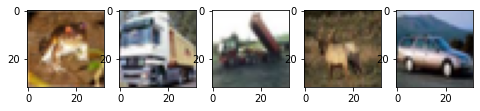

In [9]:
f, axarr = plt.subplots(1, 5)
f.set_size_inches(8, 8)

for i in range(5):
    img = x_tr[i]
    axarr[i].imshow(img)
plt.show()

Now create dupilcate the images using data_augmentation.

In [10]:
#Data augmentation
data_augmentation = keras.Sequential(
    [
     layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(32,32,3)),
     layers.experimental.preprocessing.RandomRotation(0.05),
     layers.experimental.preprocessing.RandomZoom(0.05),
     layers.experimental.preprocessing.Rescaling(1./255),
    ]
)

Build the model .

In [11]:
class_num = 10
#Build the model 
mod_builder = Sequential()
#Pass through data augmentation
mod_builder.add(data_augmentation)
#relu:y=max(0,x)
mod_builder.add(Conv2D(32, 3, input_shape=x_tr.shape[1:], padding='same',activation='relu'))
mod_builder.add(MaxPooling2D())
mod_builder.add(Conv2D(64, 3, input_shape=x_tr.shape[1:], padding='same',activation='relu'))
mod_builder.add(MaxPooling2D())
mod_builder.add(Conv2D(128,3, input_shape=x_tr.shape[1:], padding='same',activation='relu'))
mod_builder.add(MaxPooling2D())
mod_builder.add(Dropout(0.1))
mod_builder.add(Flatten())
mod_builder.add(Dense(64,activation='relu'))
mod_builder.add(Dense(class_num))

Print the summary of the model

In [13]:
mod_builder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)        

Compile the model

In [14]:
#compile the model with adam optimizer and use the loss function of sparse categorical crossentropy
mod_builder.compile(optimizer='adam',
              loss=tsf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
epochs = 25 
history = mod_builder.fit(x_tr,y_tr,epochs = epochs,validation_data=(x_te,y_te))

Epoch 1/25
1563/1563 [==============================] - 32s 13ms/step - loss: 1.5488 - accuracy: 0.4392 - val_loss: 1.3328 - val_accuracy: 0.5313
Epoch 2/25
1563/1563 [==============================] - 22s 14ms/step - loss: 1.1810 - accuracy: 0.5795 - val_loss: 1.0734 - val_accuracy: 0.6229
Epoch 3/25
1563/1563 [==============================] - 21s 13ms/step - loss: 1.0416 - accuracy: 0.6333 - val_loss: 0.9546 - val_accuracy: 0.6634
Epoch 4/25
1563/1563 [==============================] - 22s 14ms/step - loss: 0.9671 - accuracy: 0.6610 - val_loss: 0.8702 - val_accuracy: 0.6965
Epoch 5/25
1563/1563 [==============================] - 22s 14ms/step - loss: 0.9153 - accuracy: 0.6807 - val_loss: 0.8670 - val_accuracy: 0.6972
Epoch 6/25
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8688 - accuracy: 0.6996 - val_loss: 0.8352 - val_accuracy: 0.7167
Epoch 7/25
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8394 - accuracy: 0.7083 - val_loss: 0.7740 -

Plot the graph

Accuracy: 76.06%


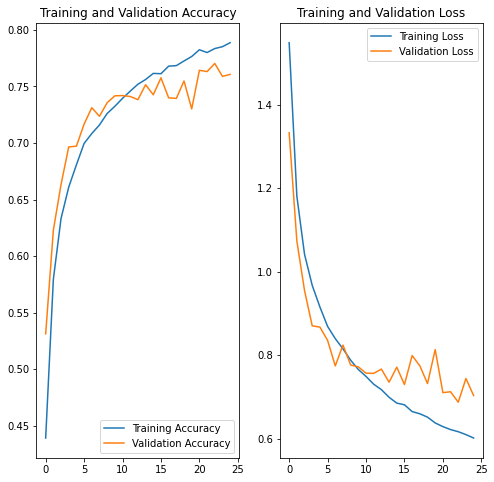

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

# Model evaluation
scores = mod_builder.evaluate(x_te, y_te, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Predict new data using this model.

Image1:Airplane 

In [20]:
plane_url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTuy1RHZVySNssgJ7i_tA96iaDlpW8IVPAU3g&usqp=CAU"
plane_path = tf.keras.utils.get_file('airplane', origin=plane_url)
img = keras.preprocessing.image.load_img(
    plane_path, target_size=(32, 32)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = mod_builder.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(cif_class[np.argmax(score)], 100 * np.max(score))
)

16384/2992 [====================================================================================================================================================================] - 0s 0us/step
This image most likely belongs to airplane with a 100.00 percent confidence.


Image 2:Car

In [21]:
car_url = "https://th.bing.com/th/id/OIP.9bThB-0dbI38LLIcQCL7hQHaEK?w=279&h=180&c=7&r=0&o=5&dpr=1.5&pid=1.7"
car_path = tf.keras.utils.get_file('Car', origin=car_url)
img = keras.preprocessing.image.load_img(
    car_path, target_size=(32, 32)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = mod_builder.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(cif_class[np.argmax(score)], 100 * np.max(score))
)

32768/18941 [===================================================] - 0s 0us/step
This image most likely belongs to automobile with a 96.14 percent confidence.


Image 3:Horse

In [23]:
horse_url = "https://media.istockphoto.com/photos/horse-picture-id490961528?k=6&m=490961528&s=612x612&w=0&h=K9xn4cac5VXju2EDPHmXhQSEZlOmaT_OPvj9Ft9hcgE="
horse_path = tf.keras.utils.get_file('Horse', origin=horse_url)
img = keras.preprocessing.image.load_img(
    horse_path, target_size=(32, 32)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = mod_builder.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(cif_class[np.argmax(score)], 100 * np.max(score))
)

57344/42208 [========================================] - 0s 0us/step
This image most likely belongs to horse with a 88.05 percent confidence.


Image4:Ship

In [24]:
Ship_url = "https://th.bing.com/th/id/OIP.WU7vqOhXv_z68XmhKnXdnQHaE8?w=230&h=180&c=7&r=0&o=5&dpr=1.5&pid=1.7"
Ship_path = tf.keras.utils.get_file('Ship', origin=Ship_url)
img = keras.preprocessing.image.load_img(
    Ship_path, target_size=(32, 32)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = mod_builder.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(cif_class[np.argmax(score)], 100 * np.max(score))
)

32768/20856 [===============================================] - 0s 0us/step
This image most likely belongs to ship with a 99.98 percent confidence.


Image 5:Bird

32768/16567 [===========================================================] - 0s 0us/step
This image most likely belongs to bird with a 80.47 percent confidence.

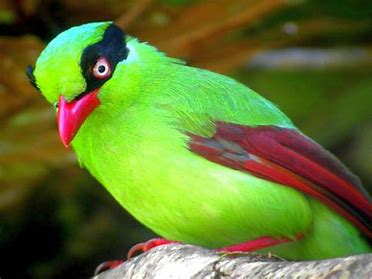

In [25]:
Bird_url = "data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAsJCQcJCQcJCQkJCwkJCQkJCQsJCwsMCwsLDA0QDBEODQ4MEhkSJRodJR0ZHxwpKRYlNzU2GioyPi0pMBk7IRP/2wBDAQcICAsJCxULCxUsHRkdLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCz/wAARCAEXAXQDASIAAhEBAxEB/8QAGwAAAgMBAQEAAAAAAAAAAAAAAwQAAgUBBgf/xAA9EAACAQMDAwMCBAUDAgYCAwABAhEAAyEEEjEFQVETImFxgQYykaEUQlKxwSNi0TPhFSRygvDxU5I0Y7L/xAAbAQACAwEBAQAAAAAAAAAAAAACAwEEBQAGB//EADERAAICAQQBAwMCBgIDAQAAAAABAhEDBBIhMQUTQVEiMmEUkQYjcYGxwTOhFULw0f/aAAwDAQACEQMRAD8A8NcXBrPvJW82nBFZ2psBQYFYmDMm6LryqQhYgNFats+3FYhZrbmm11MIM1azY3LlBxnfYXUXI/xWexMk+c0S7eDGhHIpuOG1FeT5AtcM0W3cI5oJT3URVUU9pUK5uzQtXcCji6CKzQxEUQM1VJY1ZYUx71B5ogvUgCauGNLljQadje81dHOM0oGPerq4EfWlyxhOI+JIq6qJpZbojmmLSO5B7VUlFnJDlpQeJ7UY+yqoNg+1Av3omOaUofAxLb2S7dORNKkk1AS5+tMLp2IouIi5S3dglEirZEV17ToDVA8YNQ+ehT08Z9HTNUyTVx7uKIqcV26g4aOPsUVKMF4qwWrUiUrL0dPGKK7fk1MirVIoLYe1HACaIFri4ogBNSkVpXZT4qQTRQkZNcZlUVDfwHGLrkqFA5qNcAoFy+BOaUuagmaZHG2FLJGA22oAmKCdYQTSD3aA1w+at48Bn5dVfBptrBnNBfVkzFZ8k1A1WfSrsz3kTDO5YmgkV2a7HFHFUDtsHtrkVcg+K4fpR2DKJSM1MirVJ81IHRQmq5q5A81yBUoLcVqV2V8VKKzuTSHUE4mldRqlac81iBj5M9s1bex5P71MdHGLtFuPDC3WDE+aCWPFTNQgYq2klwMc37E3R/3oqXARnmgntUUkGpaFWHZZkgVQBgTyaZte4cVf+HZmG0EsxgKASSfgDNCugHNLllLa8SKME+O1en6N+Ces64231SfwWlhWL3gDdZT/AEJ/zXsrH4G/DdpV3pqr5AEtcvFQx87UAqVpsmTlLgzsvmdPge27f4PlK2y0ABiSYAUEknxArQs9D67f/wCl03WN3zaK4/8AdFfYNP0/p+gRU02n01m0uV22xO7yWOaLcuXUUspUwJBaYP2FOeiUI7pyMrL/ABJNusUD5La/C34pufl6XfABglyi/wBzUH4a62JF1dLaKySL2oRTjmBXv9XqNa4YvdZ9pPsSUUkcBQK8B1rqd3V3rthCRaRtrSBvLDmWrFxZlqc3p6dNr3Zf03ktTm7pC1nRsHZWIO1isqZUx3BrTRVtgccVgWdVesN7XJXuDWiNYLqBhzGfrRanTTxu/Y9Lp88ZRp9jN28DgfSlSC31oZuSRmrq1U0qQ5rc7C2kAImtK0yQBisxSaKHekSfNkPHu4G72wgjFZzpLSKOWcxUC12/kOGLaUtpFMAARQwI7VcAmKW2W00ujpqQauttvFECgc0DRO5+wGDXYNXZ1FAe9Fck2C7Yddg5rvqoJpL1HPE1Rmc8mjjAHdGC5Gn1AE5oLXt05pJ7gHc0E3zMU+OC+Srl1HHAxdfnNKM5qxLPVfSJNW4xUVyZ05ymDyfvV1sXHMATRVtx+taOlCA8CSIo4vc6Qv0r7M06O+BJFVFkg55r0J2bYIFZ14IHMCuzKWPhsbHChEWav6NGkCubhSNzHrHFA/S+Ko1v4FG9QVQuKlSYuSjYubYqhtimSw8YqjMtMUmLcIgDbNT045ohZRVGuRTE2xbjFAyizUqpuLJ4qUymRSAHQOO5/SqfwNzsa2SVJ4q4VT2oP1U12aS06Me3oLhMGnV6WCo/vWggQHimEZR2FV8mryPoL9Ojz2o6YyZU/tSAtsGKkcc17C4quDigWOjXddqLViwk3brhVjtnLH4p+DWN8SKmoxvFFy9jN6T0zqPUtQum0dlrt05I4VFH8zMcRX1/oX4a6b0W1buG2t7XlR6mouAEoTkrangU30Xo/T+i6S3pdKg9VwG1F1svceMknx4FaTOAMAGOJrdxxhjjvyM8LrddPO9sOEVftwJM880O65QQDnk/Sp7i26eJMDzxQ3j+cT8/Piqep8pGONqPFmS8DbsoTM3LkhQ0I0ySP9opHUOzghFYgmBMlj2xGKJqtVp9Nbu3bzqFtAE7iBB7ADya8dr/AMXhy/8ADWRM7V9X8qjyQOf1rz2TPqtatmmjx7v5/uWsGjnkdpGl1e+2m0t24L1hLltSVUe5h2jfxur5uzE7iTkkkzyZMzNOa3Va3WO1y/eLqTOxYVBPEKKUW3OWBgHg816Px2jlpYPf2/g9NpNP6MeQJBBk9x/3rU6Rphq7wtSZbAVMk1nupmDwB9/pW9+E7YudW0Vp3C2rj7bjyFhYONxq1qIylDbHlluc3CNx7HLv4d1gcjSj1sgAKO5/lk0hc013T3Ht3Vh0JVhIORyJFfYzo7NpNtpAEjt3B7zzWFq/w30rVaj1rrahRC/6dpwq/JJic1g58OxVLhiNN5iWOVZ1wfOQp8VcLXq+o/hq8JbQ27AtW8BVd/Ucf7jcY5rBvaLUaZ9l+2yN4aP8VQyYpR/J6LS67DqVcJcisVZUJ7c0YIviiLApFmguQS2PNXIRPtVmeKVvXGMxQ+41Q4sObyigvfBBikmZiTJrqtTNhN0XZ2b6VSrTVTTIoVOfwd7Ghsavk1UiiXBTljlN8izqWNUFrNNbfipsPYU5ZGgHgrsCqRV/b8UQW2PIrptx2od1i3jd8ASQKgdhBBINWIHihsT2FHFP2Oca7DfxFyMtQXu5meaGVuHsaEyXs+00705S+4hUi7XjnNBN81U27ufaap6T/wBJpkcaAbCesanqfWh+k39JogtOT+U0W2IlpkL/AFrhY0X0G8VVrD+KHgigDOTQmdqZOmuZxVDp28GmqUUTVi8mpR/4Y/0zUovUiHsNAKQeKKopm3ZUzVrlrbxWQ8lmpJfAFVM01atgxNAUGmLbRFJcgdwY2U7DmK910Do9rQWLOoaDqryb7zf0Ici2v+axfw3o7Ws1b3rqBrOlX1CG4Nw4X9K9rKKRtEkiIHFWMEsUH6sml/8AdnlPNaqc3+mj17nCw3OVEDaQOxk1XhI3e45nxVdxLkuc5AHiumBMjPb6VmajzHqW/wCpgQ05a2EB5+s8nvVLm0Au0k5Mee9V79+Yqmoui2quw9qsAZ/qnA+lZcvJ+svTXfsWFg4PnP4r19x9Xd06udtoDeAIX1GEmT+1eWmMk9wftTXVtR6ur1jhixa/cJJmGJc5FZru382BEt5AHevoWnXp4o4/hG9p8KhFJGgiAoXDD3AGBhv3qFgqqAACZOe44716ron4UuXdNb1GoW6DqLaXQrhdwHIDAiRWF1npt7QaprTKQhYhJ4HeAfB7VowzNRpmjPRSUN6d/wCjNK7ngwJI5MD9aa0pcam0tshYeMHBPGIoem0uq1t/T6bTWmuX77hEQH9yeAByTXveh/gtrN3S6vqN5UezqFujTWtrqypkb3Pk1MpX0zGz54Y1Unye56dbvW+n6S1fZmurZG4sIOcxHxQbo2sV5zTL3gPrP2pe80wQDzmBOaxPJuE4bYyuSMXJPfyLNPYD/vWZ1Hp511rb6iqwBibZMZ5BGa1CT2mR8CgOzjhct8DH1rzENXPDKlz+BMJSxS343TPGa3pl7RwTetuPoV7T3rOJxmvd3kt3FIuWrbKYBDqpMjnBrH1Gh6SdxuWTaB/mthwoJ7nZ/wAVcbhOnBHp9F5pqNZ02zzDE5pe5gVsajp1hoOl1AOTId1P6QJrD1SXrFx7NyN6wcEEQcjIpscHFo38PkIZvtBE1BNcG49jVgjfNG6Rc3biw+a7Irott3mri15oG0RwUzVghbtRRbAq4AFBYVghZFHTTg9q6GUUVLiirGHC8j5K+TMonf4UQMVU6UeKYW6vmihlNa8NLjj2Z88spGf/AAKn+WrLoFn8v7VpjbArsoKa1iiAk2IroLZ/l/ao3T7cflp/1EHiqtdX4piyY2gdrRltoLf9NVGgT+mtFriTXQ9v4rv5ZFMzD05P6R+lc/gU8D7CtVnQR80FriZyKr5Nl8BJGe2kC9qC2nU8Cn3uLFAZxVfdEmhT0V8Vw2EjijNcFDNwVEskWqCSBDTqe1Sr+oPipVOvyNO2320TcWPxSykGaYtdqpTVGkosv6XcCltRuUAhojMZ5rVTbHFZmvtMr+ooJtuAtwR+U+asaBxWW8itFHVb9v0nuvwfav8A8DqNTcWBfuL6Y4lVX81eldvado+prz/4T6h/E9PSyyqH0hFslIhkOQ0CvQMyndHevJ6/VPFKePpnlssHOblLsGGA+uCJ7VaZJk8VTiZ+1WQboGM4rChqMmSodiVBJl9oildVbtXrVy1cP+m4UPEzEzIjvTLDbgnIzil7pXIBAZhk94opKUZqSVNDU/Y+NdW0zafXXrIyDdLW4MyrGVpzo/TtNrOo6O1euW0T0jqLhcErcZDAX2if2pv8VdPfR625rLaTZc+4qSVtXCYAEfSsHSdQfRatb6iYxH+05ia+raafrYYzT9jd0c42tx7n8Vdd6n0nV2tFoddc06WdNp3tegjA3SwDF975aD7QIpz8WWrur6N+HtXqrXp9Tu9NXU6u2FgggKxJUcZJ/X4pDS/jrRqlk6np+i1NzTSdM+qtb7lk8+wmTWbreudY/EeruWbNsvqNYVQbcbUXgRwqjn/7q9PNFQ3dV8mj6b0+7Jkkqr5Nz8D9PCW9Z1K4IFxjprBj8yrltvxNeyRgWLA4kiPpSui09jQ6PS6S0R/o2lWFGJj3H7nNMIIWfbJECMfevEavX+rkuL974Z4PK/VyuQYsDJOKG1zbAJMfShMXByZIExVGckEY7GAMiszHrm8vvYE720Xe8eYbaIkgd+IobOqkDdyJysmO9DHrkE8AkxLEzPauEXCZCEyOQFOBzAmrafqO2Iq+C7m3cEG2ODlhBz37VVVROAwBAwJyPsTVAt3AXeu73S6kEGPpwfpXQSIBUMxwrsQR9ttWVPlNMmq6BPptJeJN6xZZSf51AcAfMA1n3vw70LUS6Wr1m5OTau3CGPkC4SK2gzEGWMxMSJ/WqEzA3Bv0DfcGtKGSVEw1GSDuMqPNaj8LW7ah7Oqbacw6KxX67DP7UgegdSHuVUdR/S0H9GFe3VdrEEMdxx7hj6HzVT6oYkFdufzoAB/+uJq1GMZI1cXl9TBdp/1PAXNLdsMUu22Vh2YH9jxVCsdq+guLTjbfVSpHDKG//wBVm6jo3TdRlENs8n0zsj7GVpMsL7TNXF5+D4yxr+h41migO5Fb+q6Bql3tp3F0DhYAb9sVhaixftMUuoyNHDCD+9CouLpl5eQhl/42A9YzzUF89qEUzUVauwy7VwLc93LGUvN5ppL5A5pILXfcK56uS6AH/wCIiM13+J+az5aqkmlS1EpdnLLRoNqTHNCbUnzSRLVQk1MczR3qjv8AE55qw1PzWfmuSaY88vYjeaD6rHNCOpPmkyW81UzQublyw1kGm1LeaH6580sZqvurlyTusZN4mqFz5oGasN1c0Fv4CBz5qUPaalTSI3jDK9o+aLbucVe9tIxSwBBmqzqaNiO73NNLjEYqmoR7tplDFWI9pB4Pz8UK1cIjxTPqLFU6cJWhjUZqmN/g7Wfw+s1mj1FoLddBcS4jBbjFcEKpjcD4FfQVuBwCD9fI+or5ZdW1c9NmHutsHQg5BHFe+6Rr01mlsuxQ30ULd9MkAlcZDZrB87plka1KXfZ5bXaWWKW9dGqzKOearaunAJAJYrFDuPuB2qI77sRFK29TYs3QjwCQz4nA8isHS4m5cdmcscp/arZovBwSZBIkH+1Ba3aG5y52kAHOQDwKXfUuxLCI/MMyQI7Cs3WdXSxauXLtxraLy+2Vx5IrS0+nlknJU2Gsd8Gb+KLWnPTtdbZ522/XTZkeoCNgnv3mvmYWe044/wCa9P1Prmo6uraHSWnNk3d5cmXvETHt4A8UvpejBGT+Jf3zua2BhByC5/p817/x+OWk06WQ9BofF6jUUscePkS6Z07VdQ1FuxYAyRub+W2sgbjX1XpPTdB0iwtjT2x6jCLl4kG5eMZZm5j4rK6Ro9NpbSwFDXJZTEhvHGRWslwepMkEADB3AD75rzfm9Vk1D9NOo/HyYvkGo5Xhxu69zSEE4Ujzj+/xRgRwCJj7we+KWW5s2yQYwT2zUN5MA88A5Mx5rzsJbFwzM2UEdl4MHEwJpZ3YOZRhk7QBPbkg4qPdWRkKRxIx+ozQ3LOy7SMdwm4frNThT33IVN0WUlssCW8EqB8CaIARCm2hECTHGf8A1f4qomIAQx3UkNxExk0U4C+0YHLYP+RWkm2q9hbaS4KgWpckZjOO/biuAmSxY25x/tPbvXQbayzK0gxO3dB+Svb7VxgrAsGVpyCvOOwMQSPBFX4R45E9nXFyFOHAn/pwjgeSG5rntOAw3c7WG0j9a6pIyw3jJDwM9tpgR+tVdGgESUnBMEQcz8VcjJXyDSXEijsAHLGT3VACD9v+K6CGj03Ibgq3I+gPIqoKyxj8uD5FVugEF1AOMgY+61Msii/pGJRCBrigoygH+gyUOf5Ccj6VP9RmIUkMq7QjkAmfH+JpeXCkKGdQJINcb0istuGROJgfajx5W32C0rGRcgLKo+SpkbWUjkGO9J6zR6TXD324PElhP2PNGtlTvhvfBBOYuKM+4ea6VHiWGQ38rdoNXXkk47WTG4O4dnk9f0G/Y99jdctyfbEsPuKx/T2kg4IMGvonqJIWAG7LkAnxNZ2u6Vo9aWYKLV88PbAyY4cHmgcklyaun8g/tynjwKhWmtVodTo323Vwfyus7W+/ml8GlNN8o2YyUlcWDIqhFHIqhFCnRFASAO1ViaKRzVIim2Q0gZETVDRiKqVoos6wBrkirtVI/vT1yMUbOY4qbauFmiqlTdBdARbmr7OKMEq0AUtyFylyBCR2qUYfWpUWDZdlqsL3qPcABpc3c0iMWz0m7gYO1QYoRumYFUG9j3oqadiZNM+mPYqc0mdRia0On6u5otRavoTAPvUEgMp5BpZbBFHTTsYmq+RRyRcWuxE1Gaake1sa2zqltPp333HIRbYgvvPwaWD+prL9qUzb2vtYsFZWI2zH61iaHfpLouKxUwygqYIkRIPn5rX6foP4S/rLX8S+p9LTrcFx/wAxa6vqFTntTPDeLw49VG+7/wChvgtLCGrnfSj/ALoT1XWtIqXlb0w9oMgQqQ10jvI4rzX/AIf1L8RawMrLatAAOCX2ogMZnk+K09T0/ddRxB3vEnJGa2bi2ej6MWkYG/qJbcsCBFei0/jVDUzk1UUeun/DuhwPfF7nJ8IyDpun9JQ2NMvqXFkPdb87Me2OwrNN9izNn3GGJMz2iuX7rXGaWPOTPnmq2LTXnFtfyz7mInaPJiqXkNVFtqHCRszzYdFhr2XZudL1ZZXsM2QJUkSCvati2dTyEJUckIYI80hoLWmsCNi3GaJYqp/Y5rRRwGLW5CyQAY/wa8Lq8inNtI+MeSyYsmplPCqixkXJUQZBEfI+IP8AzXVullcbSAJUckE+c1QEtEgSQSA0D49pNEtqoIAxMe44GexHFUI493CRjzbkyjMVCwwzAjM/QUW2UzP5iBysE+e9MJprUl2bc5GWnxx7TRFRQTgk8DHx2PNXnjUVx2VpqiKE2gDYZA8/2FXUoO4Vj/KciR4rqWoMmfcRuBJj7Tn96jaYs262wwIIfn7Gr2mx2uRcVzyEKAwxX+WDk4HkiqH01MKRkZHKmhHSXBmCR8GYFdQskgicSMZU0+1HtDnBVwyF4Zdq7FkTPziGoTbrbLgbLoeF/pK8iii5aO1Sw98j3n2sBj2k9xXXVXLWw0FSrf8Ap7GZooZ1J7aK04uwO3JkAq0QS3KtgfvQ5KEwIKtBDDdiM80WFHqK0BlNxCO0kzFCult0lR7tsjIKke1hRNcgUypBW5EjaSIJ7g5gUMQrAAHlwVJ5XttNdZ2OYgKSBtPY+Z712Q8blnBB2jAMUyMaaaJ2v3KFTp2HYkSImMGATPfzRnKFbdwRF0ZHbxBqjgXLciSy5IP5hPg/3qqk+nsKklTuxmBxinqe+PfKIKNbJnaffbJMD4ohtyJkhmX3fMd81w3FRlcBixEODEHaY7fvXC3uZVMiQyEfPYz+lHiko8S5RzTOuLLo1nVWy9toG6JMd4PFYPUOgPaJu6Q7rbSyo3df9rVtsxUkdjGP5aLa1BAZGVWQ52gxtPlZrQxxxZFtfAePUZMDuHR4NkdDtdSpHY1UivXdQ6dZ1KsbIAukEgOABcj6cGvJXFa27owYMhIYEZBqjnw+m6PQafUrOr9wRAqhirkiqmkpFspFVMcVYzxVYpqRKRQqKqFoldFNTaGdHFQVcACoBVorgGzlc8101UkUNAEBipXBmpU7SaFyxbii2dMzkE1xEz2rQskLFBOdKkbEpNLgPY0SAZimPRRewoY1CgCqNqJ4qs2vcr7ZyYcKgoisg/xSJumuG4T3o4yocoP3HWvqDPjj61u9JuepY118T7go/QHE1425cOa9X+H2DdJ1bHlWPfwK3PD86uLZt+JUYuafbr/Jmai4VjyHZx8CaU1WpuXgHdySBtM5hRxU1V1hcJ+T9s0neMqv+4ljHjgCrmt1UoykrPoWeSw4tz/cpas3b95ET87sI8DEkn6Vv6bQ27Soo5P5mPJIovTOnjS2PWux61+2GI52IcgfXg07tUyVk5gfoM18+1ms9STjDo+Qed8w9Xk9KD+lf5ACwAWIGBG0jnPfNHTcpBGcjcJ5HBNdW21z2jBnk9zNMLpztBHmIImfNZ6blwzzE5N8lxub2qPaf6u/g03bUKAYkkBWnMx5oKqwgHsYE8iaZVYEsVlf5mOD4+adDIsfDK0nSDW9o7GAMTmPg0WPHHaMA/pQlEbSxH2wpA7ZNMAYB7k8GIz4ijcty4FO5EWfGK6Qw4O0ZxtxPmauFiPipt7jvmZpuNuKo7ZwCJccBWB7b9s/SQaE3qMVPpkbSJBZMfQg0Z7bEEgndBjMD60rct6z/wDIDtEkKZIH9RHNW4R3cMBJgLvo+4Dhj/qW2BX3c7lnH1zXBdtufRuE9glxsx3Ct5HiqXvX928AlCJOBPY0H86BcbgJWe4/pn+1BOEY9FqONNBblu6okBtyH3LM48zS131HmLhVtwY5wTxRFu3F2SxkMFBYxEfyvOKBfv2jKqCCMAQIjMrM9u1Nwwk+bOWL6uiyai2wuK/tdMEtwxHYx3NXW6hzOZhokQRisu+3qe5iUfbtFxAeB2uAcjz3FZYv6i07xeJExBMjiIkVsYNO8kXTNLD41Zova6PWC4EKkAliTO6YLDsfrV94bcEAA3BoJzBwQ1eYXquvRAA6sQADvAYNHBg+KMOukEG7pU3D+a0xtk+RBkUt+PyL6kirl8Rm/wDVWb5/px5BMY+lDbEQJEfP5vmkE65oWywdVEdlZhPkSBRP/E9C6llO4ZG0e0z2wcfvVeeHKuKKUtDqMf3RYwxMQeB5AP0IihlmMKwn5EfrIpQ9Y6UrMrjU4AIKqrT9t1Ubq/TD+UXmnttVfvk0cMWo2pErQ56vY/2NJLjEBGG4HtEEfekepaEasDAW6F/07mMgY2vRLGv6bdZVe96ROAL42wf/AFLitQWke0U9bTspO4PbdXg/EGa1cWlyzjcit6ebBLclR88v27ti49u6pV1JBH/egF69X1vpOpup61sb7iiTtGCvkV5MowYhgQRgg9jSJ4HjdSPQ6XMs0E/c7M12KgFWpVfBeS4KxUAFdPxXBTVD3BZYRBrtckCqs9dtvgWzrUMmpuk1wCaJYmuyVE6D8/tUqwT6fepTNgW0MqbSaJwKL6RE1QoRWQ79zRTTBk1ATVwhqwShtDOPYr7vFd2k0VVPirwO9TdoKP5A+gD2rd6O/o6LqFjtuDj6MNtZG4CmtJfC3NpMLcHpn78Va0WoeDLGbNbxsoxzrd0xDVGbkYy36dqb6XoG1WqZ7gBsaYhnIMqW/lQUvesXb2sGntqoc+3JO0Z/Mxr2Wi0drR6e1YSDHvdwPzseWql5rXrHaT5Zc/i7zHpY44Mb5aBuhZsYED++K7sNuMSNsifM0Vl9/aIGPii3FU7MABhXj1PlHyXd7gbC+4kRAywNNKYLCBtPugceIoKDaxZYmMjEgeaOql4jKzBJMQT5p3LfAbbZ1kB2xkSB9P0o4TGCASMAjM1UQrR3AMkD7c+KKi/Ycx2mj3qUvqAfJxRsnesAASeQPsaMjKYIEjE8x+1VA4iV+BBE/B5rqoS0lcxz5+4qxCW12FGPwhgQfp/b61yB258//dTaRGePyz2rsN4+smrCy37DXE5zVGto35kDTIJKg4+TVoPmp7gYmmQyPtimjOv6G6pD6UsV/mtF8R3A3dqw72tfTXjb1Vhl/pK+1xHBjgivU3d5B2s6tGNpIUkdjGawupay3ctHT3gu+R7bnEjxuXcD+la2nks30yVlvS7Zz2yjYn/F6a8SVvqQ0Ag+157blbtQrjKPZeWJHsfsR2M+Ky7umuuxNpVZRP5GBP6c0IXNdbHpi5cCj+Vvco+zVorx+5/Q6NrJ4+MY3CX7j+oiwGNwsbRAmPzfH3rzzXWV2IkAknjgfNOXU1l3aXuNCTtWfaPtVl0yXlhhDDmea0MOnlgjUi1pZQwq32J+sDEjjkjFdF6MdvpNFu6K7bOIIPByBSTC9bJm2frMirKnXRe/l5enyELjd7VIkZkGurkQJ+omqJDK0YfnbxnxRFuA5H0I7g+KF1J8l+GNpJM6LLNukkAcRXBaWPztI5+aILnYE/5rpKNAIpqURnoRQOWXBbcvHyKvbvFCILYjIMMPvQrqlTuDErwZ7UAXg2Jn+9Tua4Qj9Lh3W1ybSa7Ugqy3HKjgFju/vV72msdQVrttlTUjlXMep/6T5rGS6ok7m/XimU1XAPxBHP7VE4LJGpGdl0MH9qp/gBctvaYo6lWGCGwRQzWw161qkVL6i4BEOP8AqL9az9TpWsy6H1LXO9e3wwrOnpXj6doy8mOWN/UhWKqSBVWegs4zUKArsKbkUM3Pml2u80MOScd6YsfISjY8hphB+9KWgYFPWxiumqJouEEVKvFSk2QOYGKqQpoZc5Nc3GsmeVPo0I4mFhakLQpIqBzSLGxxBojjiqkGor10Oprm2+htJFINQKaNCnxXI+ahJvsneo9F2vXn9MhVFxV2vcUQ9wTjfXqOn6g6iwk5ZIR5Ga83b2d4rY6XdC3Qix7sgdjFVvIaN5sW99oy/LP9VHe+0apQb9wMVZwSlt5kDcF88xVfUVt8HEyv/FGsgPaIGCHJ/wC1eUcdr2/B5Oq4ZRLaqwY8AYI7A0e2qqdpEL55Ec1UqQIgkTI8/IoyMNjAcATFWo5dtDoSXTLlEAwOeCCfrioCQQfHP/PiuLiNv5W8dm5ooQ5zPf8AWieRSdxQzb8HRtDBuP12mjIOcc9uwrgtTng/GKtBiRzVvG3VMYk0X254rsCK5uNTdODVj6YsPhlSPGfpVT8g4796vBru2eaOMLdoVJCzqzSA5U9isY+xxXm+vWr3pF7tpn4i/YAExiHtjj616zYDQrlgOCrZB+v9xVrTueB7krJw5JYJqaR8u9R1/KWHzxUXVXxyxI/3Z/vXtNb+HLGo3NaOxzJwAAT8gYry+v6Lr9FLOha2P5kEgR/UOa3cGuxzdPhnrdN5HFqFtklf5ALq7bYdIPBZSP7V1mXDowMfY/cGs/YZ5PxRrSMTO5WA5Q+0/Y1qQ1EurH59JirdGNDlvW22lXBU8GRj6zzV2Sw6xhh8QRQ1uaNxscBW423BB+zCuHS2ZBtXLlszI2tI/enLn3M+UVFdNMQv2HtneqFrY/mTJX6g0tOS6H3dx5+ora/hyIIum4f5tw2z8EDFMnpeg1VpWT/RvbfcFIInztNdPC1zE0NLrklty2efDBh7TnuDg1N5GDRtV0/U6diMOoOGXDfoc0ibjDBI3A/lfB/Wq8Z80uzbWSM47l0N+rEcT5PjwRVG0+nuyw9j8+0wKBvTkyp4g/8ANW3sIyfjxR3fLCahOO2SKXNPqLMt+ZfPM0IXWB8eeacTUGQD9DXXs2buQQjfHFGpuPZWlpt3ON3/AJB2tUwmZ/tTdvWD9cMDkEHsRWXds3bZ9wMdj2NDV9vc8jmmRmpdGZmhNXZoavSl/wDU0wBnJQEftWNca4rMrAhgYIPIrUtawLGf2ol6zpdahOBejDDH60txSdmPLHtfBh5NGtrmo9h7LlHGR37H5FFtgCubXscM2VOKdQYpW0abU1VmwGFUGOBUroiOKlK3IigckGDRFzVXAk11awpF55HQTaDVSlW3ioXFCrB3yKRQmcpNEa6oE4pS7eUgzFOxxtnbmHXUR3qx1E96yHuGTHFcW43k1dWH3IUmzX/iiODRLHUrtm/YuAkbHBJ+Kyler7gRQ5MVpxfTCnjUo0z3Gl6hZuam7ZZ1HqEmyZ7nIitjT3CCQYlj+45r5eLly26XEYhkIKkHI+le16P1NNZplUt/5hDDjvPY15jyPjvTj6keUee1Ol2crlHpSBu2/wBQ+kVAGUgTIBjPEUO3ca5bBxuXDDyKMMjOP8xWLu+kpLqiw8ESOIHP6UysCBnI4pZTzgY5xRlb8v8AzRKfA+LoZVoUA/euTn68UO2xLGSSI47SO81c/WPpV5TdJj+y8zXI8VBwJ581JonNe51EmKsCcGhg0YccVYx5XXAMVuLSDVDE54qR9c+a4Zq5+ofZzi/ctAjEUN7aPyAR4OR+hq8j7zV4HP8Aamufq9kKBga78N9K1RLi0bV053WSUE+SvFed1v4T6jZ92mb11zgwr/8AFfRQm4Yg102sZGKvYY5Y/ay9h1Oow/bK1+T43esazTEpqdPcESP9RSP0bihLcuKpA3bOdpPB+DX2O7o9LfUpeto6nkOoI/esTUfhDo10s9q09lzJmxcZVP8A7SYrQhnnXMf2NLH5RdZYnzu3edpAuE4wGPujxNW9ZkIILK3mTXodd+Dr9vcbUvEkFJVvvFec1Ok1+iYrdBKTA9VYM+N1Gs+58M9BoNfpJx9P3Gm173E231VxGDHuH0IpS9YsahSYVvjhh9xS3qrMMGtnycqfuKtu7iD/ALkMipkrdmtDBgmv5bpf/ews+lupi0+5f6LnP0BoBJRtpDWz/Tc4+1aO+ec/TmquEujaQGXwwEj6d6lZ5R4krQvJpJQ5gIgncJ9rdj2opuMsHPz81S5pnUE2mlf6HOf/AGmgC66nbcER2bH6VahkU19JWjJQf1cMeF4EAMJB5BoVzTo43WzB8f8AFCDqw9sT4NXW4R3rmn3EsPZkVTX9xVkuISCDVrN7YRJNOF7biGE/PelbunIJdMjmmQy+zMbVaGUfqjyhpja1KhWIDAe0/PzSTK9pyrg84PmuW7jIciQKemzqbYUtD8ifNG4Nq0YmSDg+QFu4BFN23BrOdLtloYEDsRkH70RLvGarTgJ7NUNjmpSa3hFSq22R1BRek5q/qUsqE8UYKQKzvTTfBeaRY3G80NrpHeoxgUpdeJ4o44uQW0gj3zSz3Zpd7pmqhyTV2GGhcp/AfmrAUIMKMpBqZKgY9hFxV9wFDkVRnpVNhTbSDFxUtam9pnFy05VgZ5wf0pX1aqXk0xYk1UuUVnz2fSehdbs6wIpIW+oG5GMT2JWvSmcFTM8g+P8Amvi2nv3dPdS9aYrcQggj696+ofh7rFrqmnVHKrqkG10B5j+YA9q8f5Tx0tM/Ux8wff4M7PgUXuXRtkEZU9u9WUyRkT81ZVJHaR2qsyQDH+RWI7iVttF1L7iCB8EeKLunmD4mlN7gx37GiKdxzhh4qY5HVDYvig4fMd6sc0NQGyT7gcVcGj5qkF/U4D5ijqcUKJ7V2COKZim4kpbeQpg81JmP81QP5FQkHNXoZE0E37ottBMxXc+cVwEgCuxNOg76I4LAuODRlYGAefml8irboitDBn29kp0HcjH96Ebm2uhweaq4G2Rx/arL1Df1QImrVohug9qV1Gm0epBF20jBhBDAGf1q0gTEZqjNx8cVEdduVTKM5yTtM87rvwj0m4Gawbthj/8AjaV//VprzOr/AAv1HSlnsMtwA8rKN9xxX0M3SeYPzwaCzLnupxmoWsaf0su4PLanC+HZ8qu2tVZJF+zcQjltpA+5GKDv7ggjyP8ANfTNTo7LgkgQfPFYOr6JpLgLLaVWkmUx/amx18V96PUaT+KWuMqPKBwfDfI5FCvIriGUMvnxWlq+j3bW5rLEx2aJ/WssvdtkrcUggxMVbxzjk+qDN2HkNHr1V0xVrLp7rTbgOxOQPg1VdQsw4gjk8H700djCVO0/H5fuKBdVGIW6sHsw/wAGtCGW+JCMsMmn5jyi24/mBBqy3mFIsl21BtncvwMx8iupeD99p7inuMZLk7DqrdJ/2HWRLmQYPege+230NRXI4NE3q8Tz58UvdLHx2gs2mx51S4YZLnqIUYyCKRYm27L4NHANsyv/AN1XU294F1P/AHAdqbxNbonmc+GWGW2SIt3AqUluNSh2lez0wVRVXYAc0u+pA70tc1Ezms2K+C2EvXIBrOvXea7cuk0m7CasYsfyBJnS8matuigBuYqbjVvaKsZW52o9t6zwZim7MmlZIpIFyGyTHxQHYijgErQrimkQqyHJsXZqqLhBzXHkT3qgyauKNoFdjSXJrR0Osv6O/a1Fhyty2wI+fg1kqrdqMpIpGXCppxa4Cq1TPsvR+q2eraZNRaMXUG3UWpHsfz9DTZb/AFAfEg/WvkPTOqarpuoS/YYiI3rOHXwa+o9P6npOrWV1Ng+4AerbJG5WjIrw3kfHz00t0PtZRy4tjtdDrDkr9T8fSornvO6eeMVCoZTsJggz2I+tQYgxkRP0rD2JdldJe4YNie/xRFYkTEH5NUKhgCp+RPmuJMmZA7z/AIqUpJ8BVQwrGrT+/wClLmVzOD+gq3qCImI/amRm48M5S45CE8we9dBHBoAfJ+TM10sO9MjPa7IsY3Rjt81A8d6WDkDkn60ZIdciD8VYhOT5QSt9BfUHHfiK4WU/agvIxE/5oLXIo3nkA5sb35j9Kr6sYnnBmkW1HfuuR9KjXgy45InPeiWZ+wFsZd9h8j5oZurGDwcx4pNr5AiZ455xiKA14xI7YIPEeKbuvkVJWOXGQEmeDBjvPeglgZAMHufNLm+MT3Xa3ihNcyIaCMQfFHBITQx6n5lbn/5xQS4MqR8UJnY7TyROfihM/c8mmpfJCol22rbgR+YfasPX9OS4pYDyDA4raa5jnvQiytuVuGE0UJ+nLdDhlrFNxdnhLmmuW3ZDMjg+aEwuAEEAqeQ3Br0mv04BDgcNFItp1dSfjNbkNYmk2j0Gm8pkxLbJ2jBZTzbJ/wDQ3P2NKuquT/Jd7TgTW1f0ZQBlEr8cg/FIXbSv+YZ/q/5rUw54y6NO4ahbsT5ERee0dl0femUugiQQaDcVl9t0SvY+PvSxFyyd6Hch7eKubVLonHq54pbchqpd7HNFDBSf6WGazbV5XGDB70yt2MGD8UlRcJWjSyLHq8dP9yPpiWYqcEyKlHW5gQcVK64GE9FnXCQr6xPeuF5pcNHj7VYvilemvYquZHY+aWZuauzCgM3NWIRBbstPjnvXCY5qgYV0maZQPIZMkZxT9gDxWajCBHmm7V6MTSMsW1QLNMRHFCuRH96ot2QKjMDNUYxaZyYpcntxXEWefNGKE0S3b4q6pUglH3IlurlcGjqtcYQOKXvt8ja4FTiae6b1LV9OvpesXCCD7lztYeCKTdapRTxxyx2yVi38H1/o3WdJ1W0r2iF1CAepaYifqBWvKyCQATmexr4npNbqdDet37DsroQZBgH4NfSOj/ibS9Sti1eItakAblbCt8j5rxuv8XLTNzx8x/wUMuLa7XR6PaRkHvn/AJq0555pdLqN7GJU9jMgiqm6yEAiR2PY1gy2+yEWOBx+Q5xieKGYUmeDkTyKUa5MCYYGVk/tVvXDCCdrDzxQXuo6rC3VZYdWBXyPFc3hlGf+9ALgjGCeR2pbc6kwTt8TwaY4WrRyiP7+CIFXF+IIJgcj/istrpzk1X+IOIJxU450woy5NoalGHn68/tSl+9bAPInuDWcdQcwY80F7xP8xFWZLcuCJpPlDTXTkTI/+cVUX2iJyMfakGuxzzOCKo18jOfmlRUhKTQ810YM85+lDN0RzSHrZicVz1uxOatLGwmhw3YOTg1Vrk5x+tJm7279q56nft/arEFXZG2hg3IOCR96pcvNAzz80q14VU3AQR/8mik+eBbihk3vaZ5AqhuwUPkUo1w8/EGuC4G2/FTtfZKjQzqSGDA98gfNIovxg0S9dESe1d0vvUHkE1Zx20yxFNIn8OGVhj6Vlavp5WWUGDXofTIEiKhtpcG1hB/Y1cwRmuhkM0sX1RZ4e7aZJVxjP/wUi9tlkplOSp7V7LXdPU5gR2rz2p0tyyxIEj5rXw6mntlwzawa3HqFty8P5MV7f89s/Vavav8AAfjzRrlufcmGHIpRwCSQII/MIrVjJTVhPfp3w7Q8rNGGx2qUgrtAywqUPpotLW/kI+CQO0VWTFQnJnmhE5+KFRMeKLMcc0EkzUJJNcpqVDEqO1JNcqVJJYM1FRjIoNXQihkuAZdD9t+KZXPNJWQexpxPNUpqmKSDotEhRQw1QtSuywuAm4ZqjODQGufJqm80Sh7kOTDMfmqxQ99XBp6ursAtsJ70RA6MGVipBkEGDUQiijaa5u/pkC1aPS9L/E12ytuxrgbtoQouA+9RXrrV21qLdu5p7wZCMScZr5iqs7BUUs5wFUEsfsK1tEv4g0TKbVi8EczsuYQwJ71ha3wiy3LCuRD0ssn/ABrk9uxcSLgz2YVUvIM/m7HkH70lourLqECam0bN0yIf8j7TBg0wzDlGAjiMivLT0UsTamhE8OXG6mqKHUMpKnBFVbUzmfrnvQ7zb8sMg8ik3HO0xULA2KocN+RzQ2uxmf3rPNy4hg5Of0rgu5P7z/imx0z9xkUONePmhm+Pn70s1ycjiqE7u9Pji9mFw+xn1RQ3ueJH0oBJAznPI5rkg8H9asrTc9ESxl2uTndHxVPVfv8ArVGI7kUM3UWQ3FMWD4Jjjb6Dm7MdiBiq+tkyI8x5pK5qFkFQT9JoJ1F6fyFfvzT1osjV0Xo+L1Eo7tnBom5PBz4NU9Q8jETjzSQubjzDRwaqNRcUlXBIHeo/TNcUJ/QZPZDj3Rj5/vQhdIOeKq3pXk3W2yBlTgg/FJNceYHKmCaZDT2gsWhck3Lih170ttNP6Nvav1NZSD1IMe7vWppUO3b/ADA1LSiqRVzUlSNQMOMVU7YP7eRQgTFc3GuxZHuKxZwGEc44NZ2osKZBgg+aed8T3pW44ZSG+uKu5I+rzHsVK4u4nmNdpDaYsvHOOKzXQPlcOO/n4r1WrtG5afbkxXlbyXbLMSO9XtNOTVSfJtaPWXHZk5QufTk7lIPepRRetnJUE98VKu2/g0PQxvncJlzVSfmuVKcVEqJUqYqVxJKlTFSuOO1e3E8VQQaKgIoZOiG6HrIGKcVQBSVpoimReEc1QyJ+xAUgDNBYkVGujzQHu+T+lRCB1lixmqlsUIsT5rkmR471ZUDuwwMfeiK1BWiqrMVUckgD5JMRRqNEod0mm1esfZp1B2xvdjtRAe7E1u2OjaJABf1N245GRaCooPwTml799el6axpbMeqV3sf955Yn+1D6dpeua+8t22G9NHBN28SlqfAnJpEpTlbxL9zTxYtPhr9Ry/x/s2mOn6Ugt6QencZJu3Wy+eBuNMdMsfiDXlvT0951J2LdvH00z8vn9q2umdHTU321NxRfWxsD3mgWhcAwqTya9Vp9JqA1xrrC0LSD01sw1xWIn/VJ9sjEVyxSnTyv9jW/8tg0i26WCb+X/wDh5Jfwt1J9x1OssJsVrji0jNsTjLNAx9KZs/h8FTZtX7967Ek25A2ngnt+9bd7T6lrV9bT6hmcbrr3WBDAGQbkVXSW9aLNz09WUsoyq7p7F3ckbo3E/Ap6xQ7q/wDsztR5fVan72v2RiP0TVKodNSqgErsvlvdtH9URSp6YzKSuu0nqCJX/UgnxuiK2Nfpb19rbXWuH8+wM7gndyVSf3pC3onVSUtbvJEn4pUtJhm+Yr+xkZayvdJf6Ma9pNYhI2K+Ym2ZB+RWfdLIWV0ZGUkHGP1r3SdH1dqybtxLilhlQUlQRORNZl7RKbiB7AKspE5j6kj/AIpE/G4n1wV5YI+x5MXGk5xU9UkwOfAravdKtW5YKrFydotB2Kwcggd6W/hNBb1DWwNXddj7LduyVbPcZNV56CMFcnx/Qdi00Jf8k6/s2Ib7g8nyIqFiZlYx5prV6fSo5S7qDYubQdpHqkR2YpiaWDdI49XXu8gFkS0ix3IDSaHHh06fZ6DT6LxsEpZJNgWPbcQT2+KExt9+fmjtZ0Du+zVX0t/y+paDMR49poSaXTe9rl/bHG8EMZ+BVnhfYka0db47TL+TH/oAbiycGO20VybjiFtn6mmxbQAsjIVDbSTgz8zR7Gma+NUUZZ09r1CAQZkgQKBzyGXqPNyycQx/uZq2LrZYgfSiGyhHuk0w63EALIQDwwgqfuMULcDxVaWZpmHl8hnm+XX9AGxFMqIPmhssmRTJHegnBqvLI30UZZZStthbKiB5p+2YikrRAPwaZB7Z+oqlO7sqy5NBSpFcaM0st4xFE9QMMmuUuRDOEtkdqHsBkHE8eKuW+aqZ4HJ+prRwzk+EiNrfSBbCNykYzFZHUNGHVoA71ui3fYSLVwzgHaape0WpaJtxMjJFWlhyXuiRjx5Yy4R8+u6e8juo4B81K9m3QNRcJf8A0c+W/wC1StBZsqX2mqpzro8FUqVKslglSpREWc1zIboqEY1YI2cc0wlsEUXYIpLyUDuYotrzRY4q7ADihM0ZNcnuIq+y+6Kr6hBiTQWc5iqSZmi2JhoZN48T9K5umKEoJJkdpo1q29x0tplmIUR5OK7akdQW1avXmCWkd2PAUE48mnB07VD8wC+QTP8Aatu5f0fRdKmk0qi5rL6A3mjc8x2ND6foesa27be5aZLJP80KzfQHNRJuqiuSzhhju8r4M5em3hb37l5I21qdP/DvVNVdssibbQZCbreZ/Kq8k17PQdD0tjZc1QW46+4W/wCUfJrY0rBbymdn5tioIgCPyiogpNfWP1D00Vtw8v5MbTdB0OlujWdV0ouPh9jbmZlXCgAYAPBrZ0Wjua5rmpvW0s6ZAfTtKNiKOIC8x/mtnV6crYTSIwGo1u06i6xBZbI/kT58UTQ6VT6hZSLKBFCBsNtON3wOTRqoqkUpNyk5SKaPSFFRYWzp/V3WkMqSAYBIHc0zcuOS1jTW1YK4tpiUNw5LPHYd/pSmuD6rUb7d1hbQiBwF2gdvmmNDZuW/UuP6hc+y2k8ryXZh3P8Aiork78jum09nT22CsbjuYuO3LH6DAFUu2rjpc2WyPSkWLcqEJA/M0Z+lM27e0bjG4iDBwMzii0YJjHpuf4rVNe1WpKgJa37bSdoWIgeaas6a5aUKHVFG0+22kCPqKfqu1QSeZ5mTXJUcDFlCF3M7kTta4dxE8kYj9qE2m0cgegrt7h+USAec0yzoiszsqovLNgAVj6vq1lkuCzdUKCE3Tm4Dg7fpXWcD6jrPw/01L13VG36igbrdlZuBiMZGKwtOdT1t21Gj0GzTLCFLrIjuHPLRDbfGaV6wdM1qx/DAXGOoD6kbWYPaQg8ATFa/Ter6bqLa/ZcXT6bS20wAEfUXGBwZziKTKm+QtvFiF/8AC1jUXRZtOjXtwN0WA2y0O5LN7foKDe/DfRNA7Kz+vdddw98hYx+UED616F+oW7NpdPZLKNoa41tQGckSYIzWXotLfv3b+o1Ftyl94t2mYEhR3KAY/WjVPiJO6VV7GUdDp8mzpnuOCWPo2lKgARSA6D1DUtdvJ0zV3A//AEEKemoPkliK+iaVktIqIltWAI3H8wEzJJ4FU1XULtgC3ph6t15m4xlU8QDRPjgFfg8De/DP4ha1D6NigC/6aX7YZScy5B2kfekv/BeraVLlo2za9RNrAXLbF18e017HV63UXi2l9dXvBd11z7VtA5hQuKHa0aqnrW1Fy64htRqSFRB5Xcf0oai1yidzTuzwTdM6taYC2DbQYZHK+mZ8rNWfp2pNuSFtXOwDhlb6KMivTrptVqdSqaVLeoa04e49xf8AyyZ4djitXT9HWbmq195UUM2xLdvYrzkkbsx9qh4oPtA0n2fP7PT+rOSvpBjwgUks5/2iKJ/4L1wS13Temv8A/YwBx8V9EC2dMlx7S+mSf9PeAXZfOKHp9K3UHuXLu53BwY220HYAUr9Li+APTieGs9G6k/Crt55z9ozRrnTNTp/TW8yBnyoEkkfaveabSWrJvItgi40g3HYkFR/aln6e1pzqHVL1933DdhLazgAHxQfpMN/aB6MPg8xZ6JeubCxue4TCpkfJNMP0jTWWCuXciJUNAz2JFei2v71S8VU5f08EfEms8egb7fxNwWtJbZizO8XLzePMUfoYMfO1DI4o/AtZ0PTnH/8AGwGgtuYgR8k81qLa6RpbIaxogCQN9y6RuIHyeKBd6poLwTTaZVW0p9kIRPyKzOqNqtm0C4LMgyMLPyKNVX0qg9iiW1PUrL3ES1ZtgoTv25UmfNJ3r7O8+0RiPH2quj0jE+qxthVMy396dt6S299bu2UPHcn5NOX5IKWtNqHQMlo7TkFiAT9qlaTakWSbaNahMffvUqLOPg7o1t3RvzIzI0Hupg1WpUojjtWViCPrUqVDOGUaIohc1KlIrkGgFy4aAWJGalSmxSJK13mpUoyS4BnntXp/wx0LWdU1unNt7SKrBizmTHfEVKlDLoG+T2o6N0/Q6u+UBu3phr10AsSP6R2rZ0thLdskKOR9alShhyiRjeWZ0CKIX6kr8mm9LpW9VdWQD6fsUTEs2CSKlSoXLCbNFNONZrzcuOwTQ2rYKr/NcuLuJ+gGKfvNasaR7z2z6dsB2RDBKA4E/wB6lShRLdmBZW9H8WzQbpe+4DFgd2VEHEAV6HSeo6Nccgb42gD8o5ipUpqXJ0hriqjfuaQu3+UiZ+9SpRAnZ9xHiD+tD1F5bFm7eYEi2JIHPIFSpQtnHm9Td1XVbj2muFNHObS43gCfcRml7WifqN86W062LGnQhmRRv2ySAAcSe5qVK5ElOrajTdD0nVNHatO9x7FvdddhJ3wIxXjel9P1PVm1irfFm+qteQhfb9MVKlBVt2ddHptJb6jZFttVqUuWrQC3VtWwj7QP5X5+tadnVa3Xaj/yCWbdpNqD1uQn5jgd6lSpxxQxuhvWal9PaFq2ovahbXqMbkKpJbZ2pG4up1IuWGfbddQLjqYgdwpA/wAVKlclxYEnwZzWRZJ0ekVU2n1bjt7jddcDeTmtLS3NNbR9TeLaq/b/APL2bTKE01p2EsVUz+tSpSnJ2kEl7mhojb0aK+pC7r7M9u1ZX/TWBJOe9J3NdfvPqb1yygt2wVsDcSx3fzOOPtUqU1cv+gDBdMdNVeui6ktzvYkkKPimrfUlvtftaa1ss2bht72Pvdl5MDtUqUmf31+DkrTF7Wu1Oo1VyxYKwnsdrs/9TyI7CmdaXQIv570EKSxCbj3IFSpS5NrbXuPjFN0Yl7U3NDZub29S9ef2mBtSZ4rLWxd1oe5euNPCCZA+TUqU7Ek7bOl9KVDXT9N7jxtQlAP80z1EMbQsEzMTuOOfipUpbm3lUX0JSuxRNMPSXbjb7j4Md4ooD7WhoSDMYNSpVuXRC7CWNHfu2lddgBnnnBqVKlEG+z//2Q=="
Bird_path = tf.keras.utils.get_file('Bird', origin=Bird_url)
img = keras.preprocessing.image.load_img(
    Bird_path, target_size=(32, 32)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = mod_builder.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(cif_class[np.argmax(score)], 100 * np.max(score))
)